In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

# do something to prove it works
rdd = sc.parallelize(range(1000))
rdd.takeSample(False, 5)

[319, 613, 423, 808, 894]

In [55]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process

print('Modules are imported.')

Modules are imported.


/opt/conda/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
spark = SparkSession.builder.appName("Covid19Analysis").getOrCreate()

covid_data = spark.read.csv('part-00000-d15c0132-834c-4976-ad28-7286de542a86-c000.csv', header=True, inferSchema=True)

In [13]:
# Perform necessary data transformations
covid_data = covid_data.withColumn("year", F.year("date"))
covid_data = covid_data.withColumn("month", F.month("date"))

# Filter data for the year 2021
covid_data_2021 = covid_data.filter(covid_data.year == 2021)

# Calculate total confirmed cases by country and month for the year 2021
total_confirmed_2021_monthly = covid_data_2021.groupBy("country", "month").agg(F.sum("confirmed").alias("total_confirmed"))

# Order the result by country and month
total_confirmed_2021_monthly = total_confirmed_2021_monthly.orderBy("country", "month")

# Show the result
total_confirmed_2021_monthly.show()

+-----------+-----+---------------+
|    country|month|total_confirmed|
+-----------+-----+---------------+
|afghanistan|    1|        1671259|
|afghanistan|    2|        1553102|
|afghanistan|    3|        1737068|
|afghanistan|    4|        1733260|
|afghanistan|    5|        1991950|
|afghanistan|    6|        2848717|
|afghanistan|    7|        4241348|
|afghanistan|    8|        4696019|
|afghanistan|    9|        4628009|
|afghanistan|   10|        4827238|
|afghanistan|   11|        4701215|
|afghanistan|   12|        4889195|
|    albania|    1|        2088163|
|    albania|    2|        2610775|
|    albania|    3|        3652195|
|    albania|    4|        3865660|
|    albania|    5|        4089156|
|    albania|    6|        3973546|
|    albania|    7|        4113962|
|    albania|    8|        4262873|
+-----------+-----+---------------+
only showing top 20 rows



In [15]:
pandas_df = total_confirmed_2021_monthly.toPandas()

In [16]:
pandas_df.head()

,country,month,total_confirmed
0,afghanistan,1,1671259
1,afghanistan,2,1553102
2,afghanistan,3,1737068
3,afghanistan,4,1733260
4,afghanistan,5,1991950


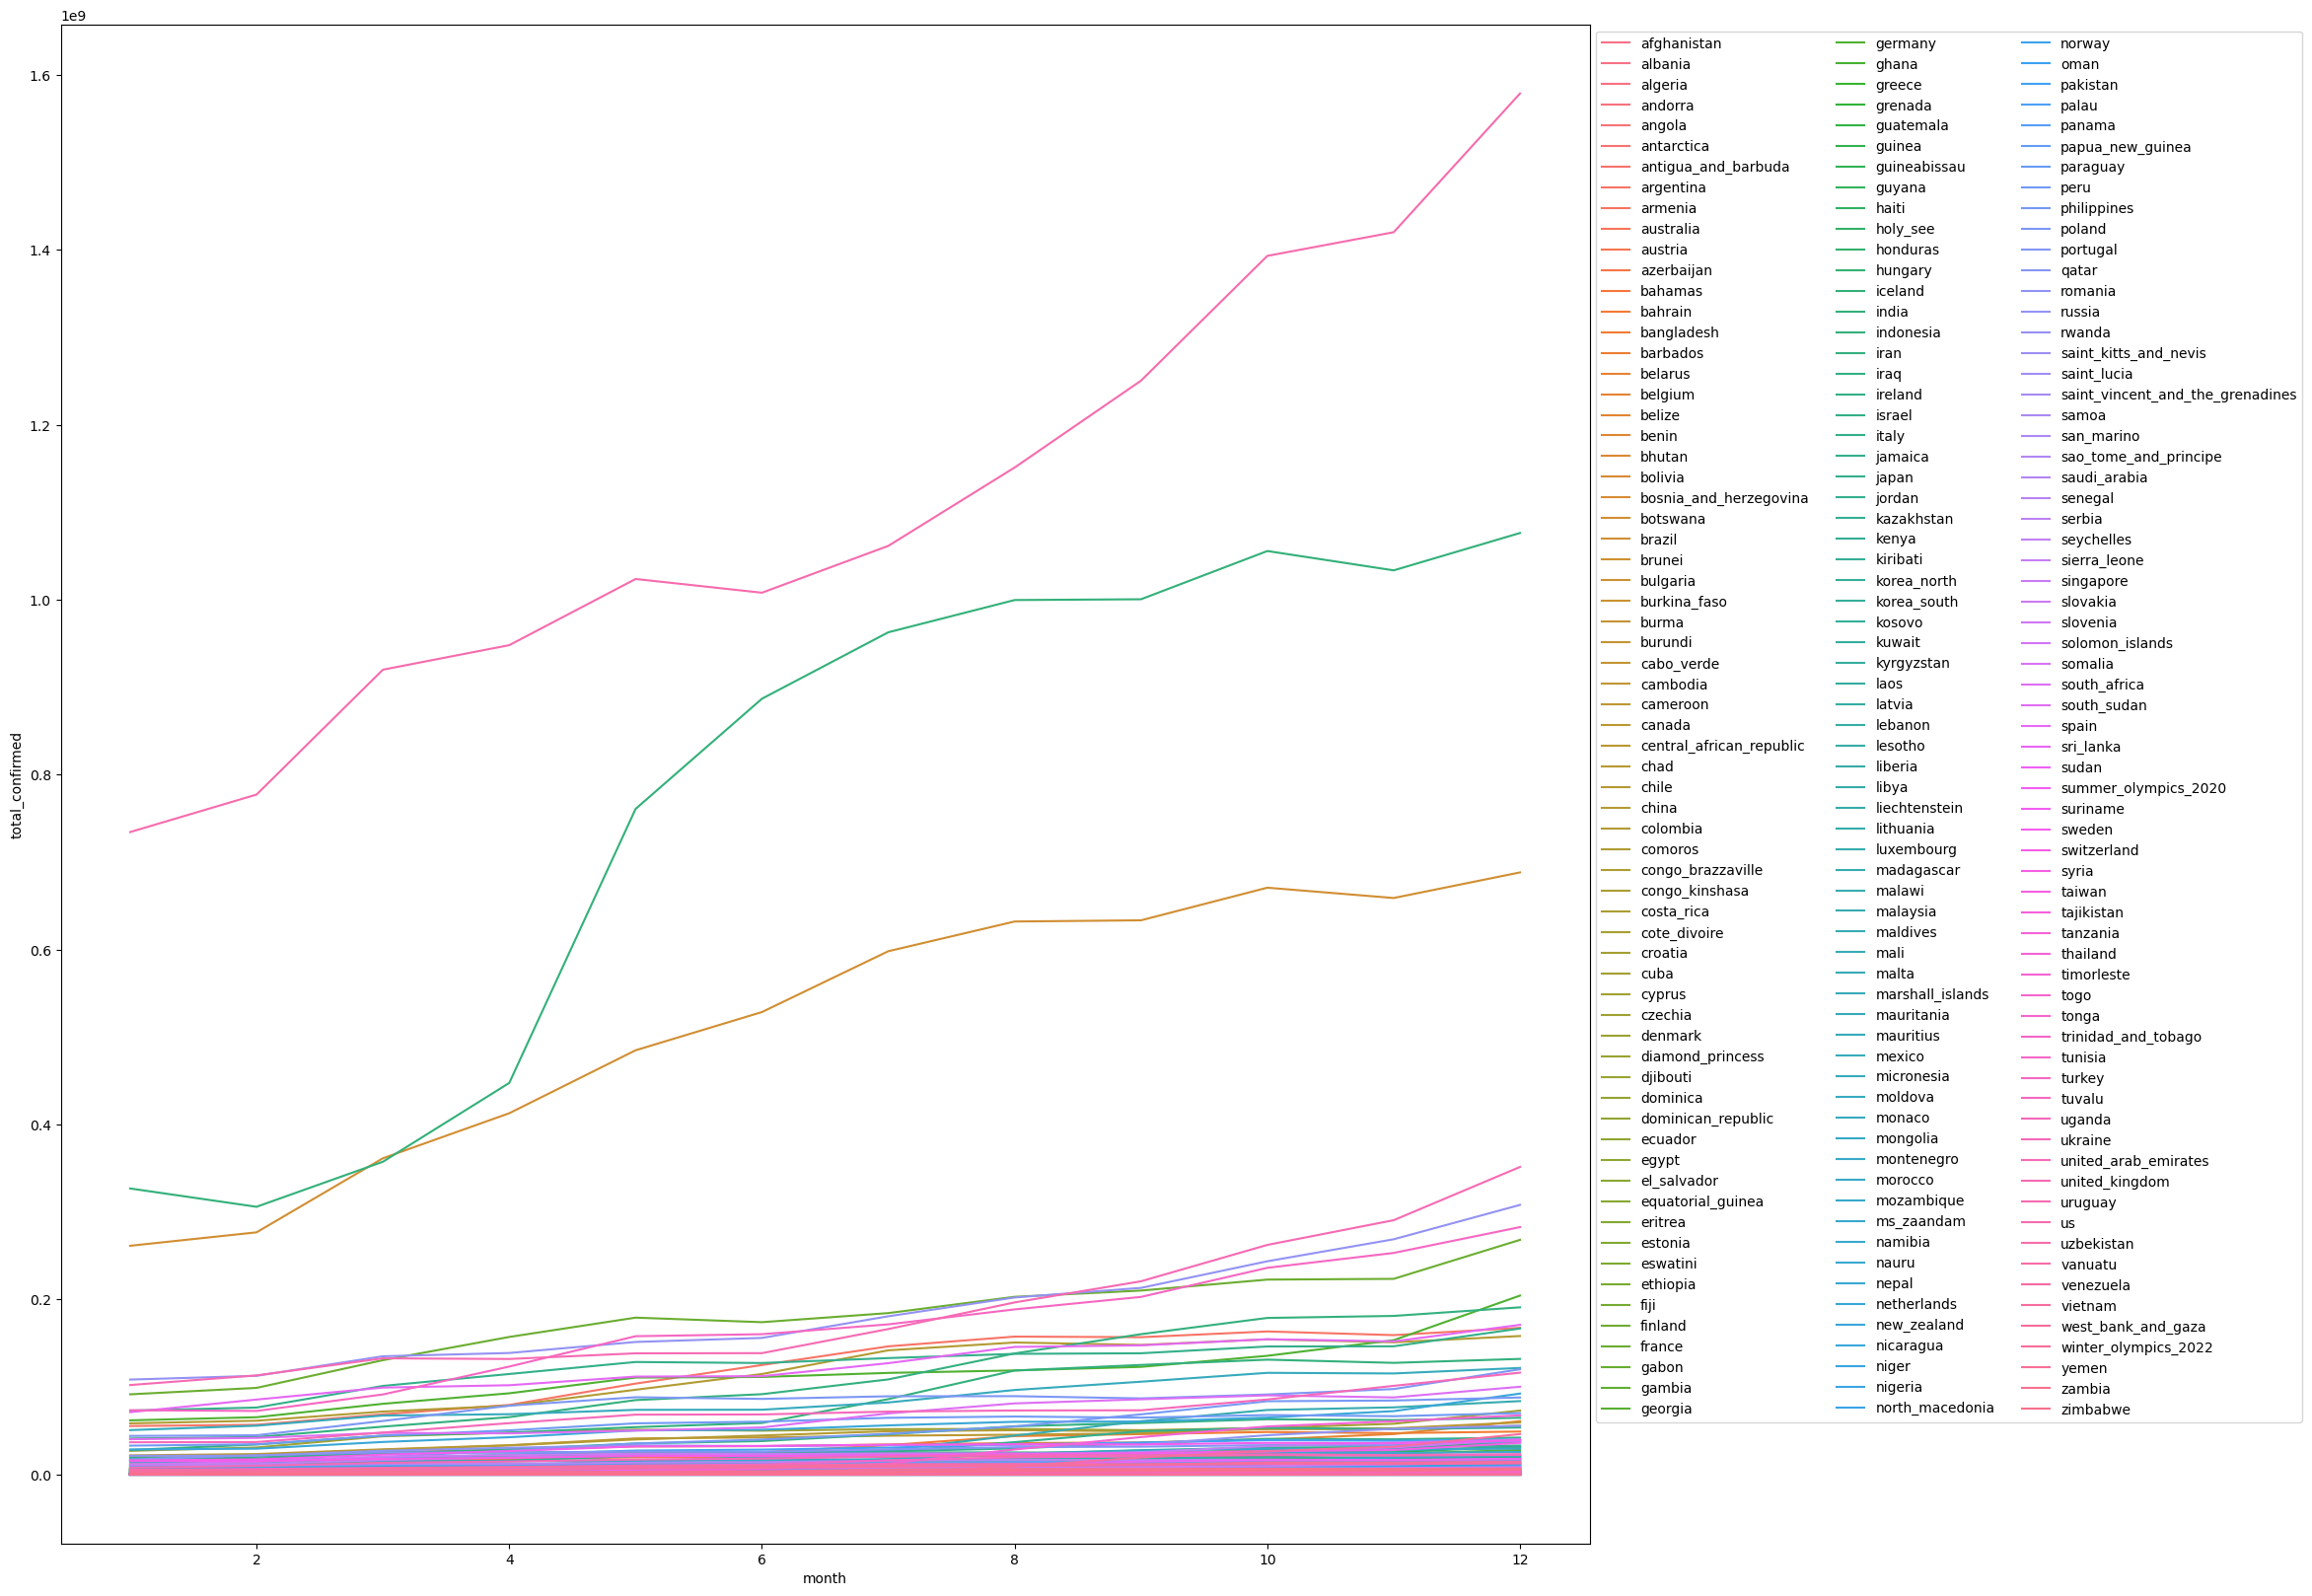

In [39]:
plt.figure(figsize=(20,20))
sns.lineplot(data=pandas_df, x='month', y='total_confirmed', hue='country', markers=True, dashes=False)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.show()

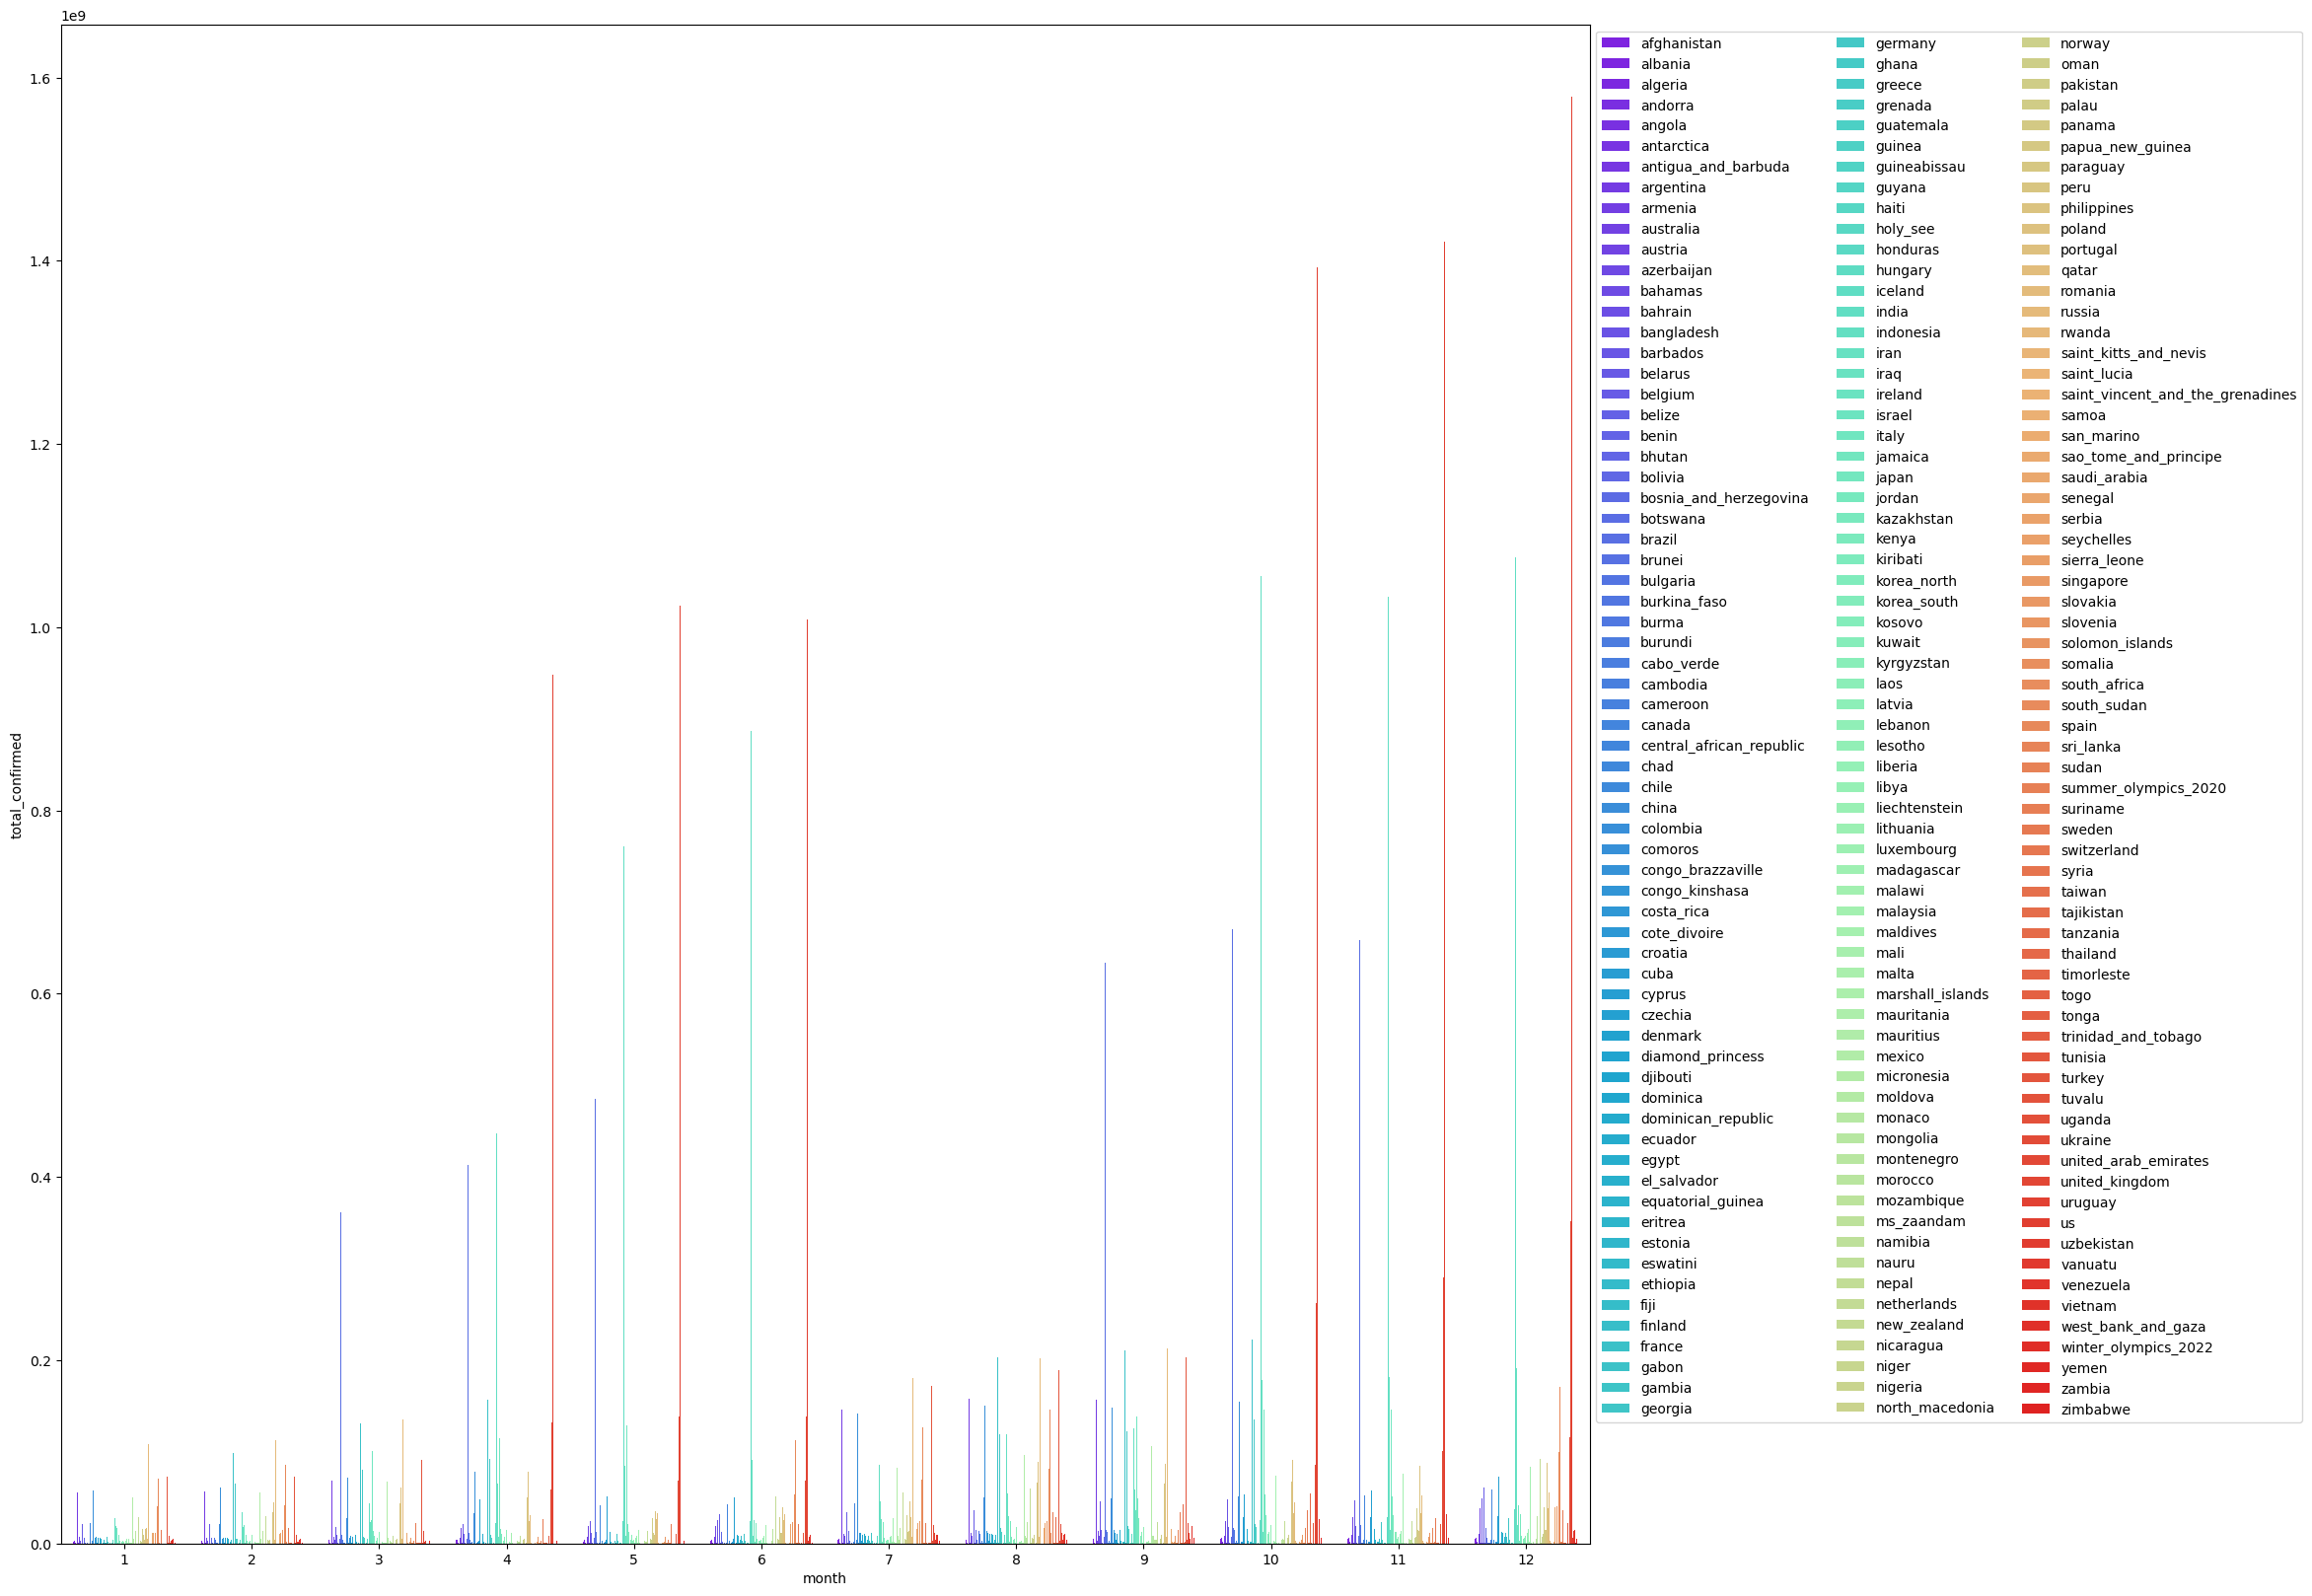

In [40]:
plt.figure(figsize=(20,20))
# Create a bar plot
sns.barplot(data=pandas_df, x='month', y='total_confirmed', hue='country', palette='rainbow')
plt.legend(ncol=3, bbox_to_anchor=(1,1))
# Show the plot
plt.show()

In [50]:
pandas_df['country'] = pandas_df['country'].str.lower()
world['name'] = world['name'].str.lower()

unique_countries_data = pandas_df['country'].unique()
unique_countries_map = world['name'].unique()

print("Unique countries in data:", unique_countries_data)
print("Unique countries in map:", unique_countries_map)

Unique countries in data: ['afghanistan' 'albania' 'algeria' 'andorra' 'angola' 'antarctica'
 'antigua_and_barbuda' 'argentina' 'armenia' 'australia' 'austria'
 'azerbaijan' 'bahamas' 'bahrain' 'bangladesh' 'barbados' 'belarus'
 'belgium' 'belize' 'benin' 'bhutan' 'bolivia' 'bosnia_and_herzegovina'
 'botswana' 'brazil' 'brunei' 'bulgaria' 'burkina_faso' 'burma' 'burundi'
 'cabo_verde' 'cambodia' 'cameroon' 'canada' 'central_african_republic'
 'chad' 'chile' 'china' 'colombia' 'comoros' 'congo_brazzaville'
 'congo_kinshasa' 'costa_rica' 'cote_divoire' 'croatia' 'cuba' 'cyprus'
 'czechia' 'denmark' 'diamond_princess' 'djibouti' 'dominica'
 'dominican_republic' 'ecuador' 'egypt' 'el_salvador' 'equatorial_guinea'
 'eritrea' 'estonia' 'eswatini' 'ethiopia' 'fiji' 'finland' 'france'
 'gabon' 'gambia' 'georgia' 'germany' 'ghana' 'greece' 'grenada'
 'guatemala' 'guinea' 'guineabissau' 'guyana' 'haiti' 'holy_see'
 'honduras' 'hungary' 'iceland' 'india' 'indonesia' 'iran' 'iraq'
 'ireland' 'isra

In [51]:
data_countries = set(pandas_df['country'].unique())
map_countries = set(world['name'].unique())

common_countries = data_countries.intersection(map_countries)
missing_in_data = map_countries - data_countries
missing_in_map = data_countries - map_countries

print("Common countries:", common_countries)
print("Countries missing in data:", missing_in_data)
print("Countries missing in map:", missing_in_map)

Common countries: {'canada', 'liberia', 'netherlands', 'tunisia', 'bulgaria', 'afghanistan', 'guinea', 'hungary', 'togo', 'albania', 'egypt', 'nepal', 'tajikistan', 'austria', 'armenia', 'spain', 'azerbaijan', 'libya', 'colombia', 'cyprus', 'vanuatu', 'somalia', 'niger', 'fiji', 'israel', 'ireland', 'ghana', 'lithuania', 'pakistan', 'finland', 'uganda', 'slovenia', 'italy', 'australia', 'iraq', 'sweden', 'ecuador', 'botswana', 'russia', 'uruguay', 'cambodia', 'eswatini', 'chad', 'guyana', 'algeria', 'kenya', 'nigeria', 'jordan', 'czechia', 'kosovo', 'slovakia', 'portugal', 'senegal', 'estonia', 'benin', 'sudan', 'luxembourg', 'burundi', 'ethiopia', 'brazil', 'laos', 'switzerland', 'bahamas', 'djibouti', 'poland', 'mali', 'serbia', 'lesotho', 'malaysia', 'qatar', 'nicaragua', 'kyrgyzstan', 'suriname', 'gabon', 'eritrea', 'lebanon', 'belize', 'kazakhstan', 'peru', 'malawi', 'kuwait', 'guatemala', 'mongolia', 'china', 'croatia', 'brunei', 'iceland', 'taiwan', 'montenegro', 'japan', 'denma

In [69]:

def fuzzy_match(country, choices):
    match, score = process.extractOne(country, choices)
    if score >= 50:
        return match
    else:
        return None

map_countries_list = world['name'].unique()

pandas_df['matched_country'] = pandas_df['country'].apply(lambda x: fuzzy_match(x, map_countries_list))

merged_data = world.merge(pandas_df, how='left', left_on='name', right_on='matched_country')
merged_data = merged_data[~merged_data['name'].isin(['winter_olympics_2022', 'winter_olympics_2020'])]

In [70]:

unique_countries_merged = merged_data['name'].unique()
print("Unique countries in merged data:", unique_countries_merged)

unique_countries_map = world['name'].unique()
print("Unique countries in map data:", unique_countries_map)

missing_in_map = set(unique_countries_merged) - set(unique_countries_map)
print("Countries missing in map data:", missing_in_map)

missing_in_merged_data = set(unique_countries_map) - set(unique_countries_merged)
print("Countries missing in merged data:", missing_in_merged_data)


Unique countries in merged data: ['fiji' 'tanzania' 'w. sahara' 'canada' 'united states of america'
 'kazakhstan' 'uzbekistan' 'papua new guinea' 'indonesia' 'argentina'
 'chile' 'dem. rep. congo' 'somalia' 'kenya' 'sudan' 'chad' 'haiti'
 'dominican rep.' 'russia' 'bahamas' 'falkland is.' 'norway' 'greenland'
 'fr. s. antarctic lands' 'timor-leste' 'south africa' 'lesotho' 'mexico'
 'uruguay' 'brazil' 'bolivia' 'peru' 'colombia' 'panama' 'costa rica'
 'nicaragua' 'honduras' 'el salvador' 'guatemala' 'belize' 'venezuela'
 'guyana' 'suriname' 'france' 'ecuador' 'puerto rico' 'jamaica' 'cuba'
 'zimbabwe' 'botswana' 'namibia' 'senegal' 'mali' 'mauritania' 'benin'
 'niger' 'nigeria' 'cameroon' 'togo' 'ghana' "côte d'ivoire" 'guinea'
 'guinea-bissau' 'liberia' 'sierra leone' 'burkina faso'
 'central african rep.' 'congo' 'gabon' 'eq. guinea' 'zambia' 'malawi'
 'mozambique' 'eswatini' 'angola' 'burundi' 'israel' 'lebanon'
 'madagascar' 'palestine' 'gambia' 'tunisia' 'algeria' 'jordan'
 'unite

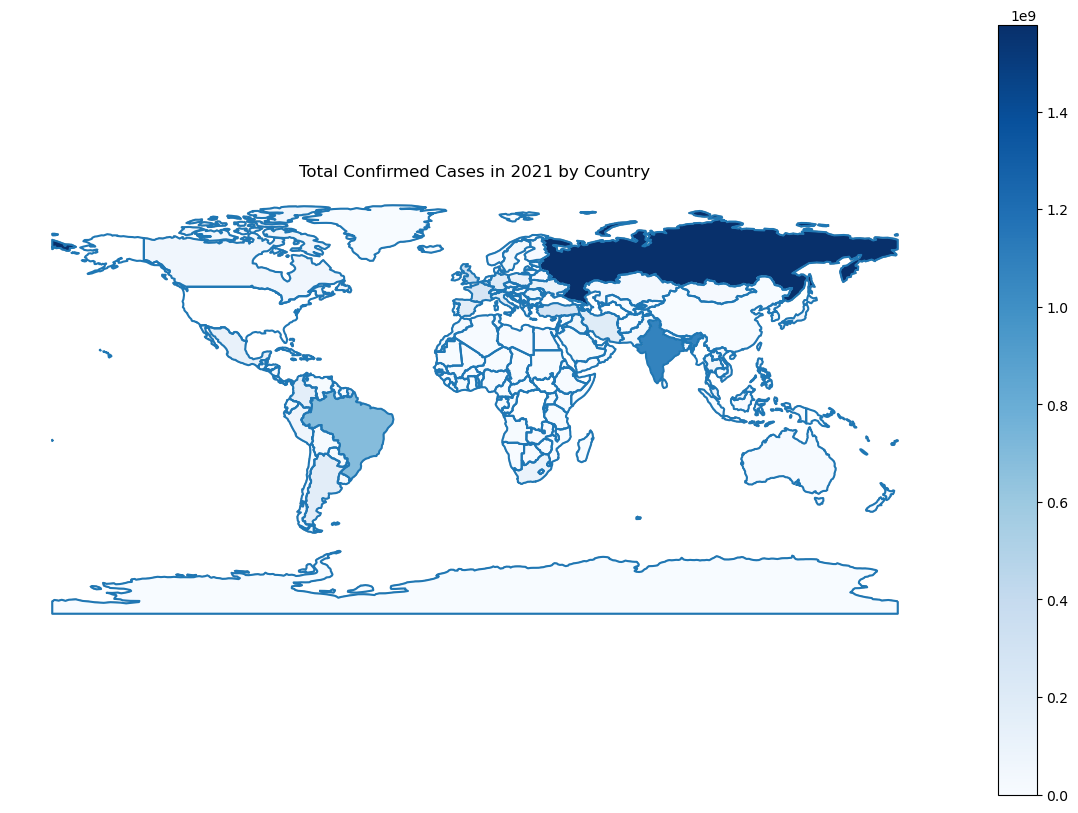

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)
merged_data.plot(column='total_confirmed', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Total Confirmed Cases in 2021 by Country')
ax.set_axis_off()
plt.show()

In [89]:
total_confirmed_2021 = total_confirmed_2021_monthly.groupBy("country").agg(F.sum("total_confirmed").alias("total_confirmed"))

total_confirmed_2021 = total_confirmed_2021.orderBy("country")

df = total_confirmed_2021.toPandas()

df.head()

,country,total_confirmed
0,afghanistan,39518380
1,albania,51106141
2,algeria,57172988
3,andorra,5084330
4,angola,14797145


In [98]:
map_countries_list = world['name'].unique()

exact_matches = {}

for country in df['country'].unique():
    exact_match = process.extractOne(country, map_countries_list)

    if exact_match[1] == 100:
        exact_matches[country] = exact_match[0]

print("Exact matches:")
print(exact_matches)

def fuzzy_match(country, choices, exact_matches):
    if country in exact_matches:
        return exact_matches[country]
    else:
        match, score = process.extractOne(country, choices)
        if score >= 80:
            print(f"Original country: {country}, Matched country: {match}, Score: {score}")
            return match
        else:
            print(f"No good match found for {country}")
            return None

df['matched_country'] = df['country'].apply(lambda x: fuzzy_match(x, map_countries_list, exact_matches))

# merged_data = world.merge(data, how='left', left_on='name', right_on='matched_country')


Exact matches:
{'afghanistan': 'afghanistan', 'albania': 'albania', 'algeria': 'algeria', 'angola': 'angola', 'antarctica': 'antarctica', 'argentina': 'argentina', 'armenia': 'armenia', 'australia': 'australia', 'austria': 'austria', 'azerbaijan': 'azerbaijan', 'bahamas': 'bahamas', 'bangladesh': 'bangladesh', 'belarus': 'belarus', 'belgium': 'belgium', 'belize': 'belize', 'benin': 'benin', 'bhutan': 'bhutan', 'bolivia': 'bolivia', 'botswana': 'botswana', 'brazil': 'brazil', 'brunei': 'brunei', 'bulgaria': 'bulgaria', 'burundi': 'burundi', 'cambodia': 'cambodia', 'cameroon': 'cameroon', 'canada': 'canada', 'chad': 'chad', 'chile': 'chile', 'china': 'china', 'colombia': 'colombia', 'croatia': 'croatia', 'cuba': 'cuba', 'cyprus': 'cyprus', 'czechia': 'czechia', 'denmark': 'denmark', 'djibouti': 'djibouti', 'ecuador': 'ecuador', 'egypt': 'egypt', 'eritrea': 'eritrea', 'estonia': 'estonia', 'eswatini': 'eswatini', 'ethiopia': 'ethiopia', 'fiji': 'fiji', 'finland': 'finland', 'france': 'fra